<a href="https://colab.research.google.com/github/yankyerajoseph/yankyerajoseph/blob/main/Appendix_4_Kinetic_Modelling_of_the_AD_of_Pretreated_Fibrous_Waste_Mixture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print ("Python codes to generally describe or analyse biogas trial data")

Python codes to generally describe or analyse biogas trial data


In [ ]:
print ("Introduction")

Introduction


In [ ]:
Researcher= "Joseph Yankyera Kusi"
print (Researcher)

Joseph Yankyera Kusi


In [ ]:
Program = "PhD Sustainable Energy Management"
GrantingInstitution = "Dep't of Renewable Energy Engineering, School of Energy, University of Energy and Natural Resources, Sunyani, Ghana"
print (Program)
print (GrantingInstitution)

PhD Sustainable Energy Management
Dep't of Renewable Energy Engineering, School of Energy, University of Energy and Natural Resources, Sunyani, Ghana


In [ ]:
Supervisors = "Prof. Dr. Nana Sarfo Agyemang Derkyi", "Prof. Dr. Stefan Pelz", "Prof. Dr. Francis Attiogbe"
print (Supervisors)

('Prof. Dr. Nana Sarfo Agyemang Derkyi', 'Prof. Dr. Stefan Pelz', 'Prof. Dr. Francis Attiogbe')


In [ ]:
#These lines of codes are attempting to import all the data sets that will be analysed

In [ ]:
#Prepare the necessary foundations
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Codes to enable easily manipulation of data
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#extra libraries
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/SummaryofBY/HMNHMMetal.csv'
data = pd.read_csv(file_path)
cleaned_data = data.dropna()
print ("Hydrolysed Materials")
print (data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Hydrolysed Materials
    HRT (d)   YPCM (ml/g oTS)   HM (ml/g oTS)   NHMM (ml/g oTS)   \
0       0.00              0.00            0.00              0.00   
1       1.00             11.35           25.36             12.21   
2       2.08             96.45          184.58            168.56   
3       3.09            197.16          249.39            251.62   
4       4.02            266.67          312.79            315.84   
5       4.93            307.80          370.56            362.60   
6       6.84            363.83          466.37            438.68   
7       8.07            381.56          508.64            457.53   
8       9.05            392.91          519.91            467.30   
9      10.74            410.64          532.59            480.56   
10     11.09            412.77          534.71            482.65   
11     13.86            434.75    

In [ ]:
import pandas as pd
from google.colab import files
descriptive_stats = data.describe()
# descriptive_stats = descriptive_stats.T
descriptive_stats.insert(0,'Column', descriptive_stats.index)
print (descriptive_stats)
print (data.columns)
data.describe(include='all')
descriptive_stats.to_excel('descriptive_stats.xlsx', index=False)
files.download('descriptive_stats.xlsx')

      Column   HRT (d)    YPCM (ml/g oTS)    HM (ml/g oTS)   \
count  count  20.000000          20.000000        20.000000   
mean    mean  12.193500         349.185000       436.360000   
std      std   8.899641         154.945497       183.930345   
min      min   0.000000           0.000000         0.000000   
25%      25%   4.702500         297.517500       356.117500   
50%      50%  10.915000         411.705000       533.650000   
75%      75%  17.325000         454.432500       556.550000   
max      max  30.040000         483.690000       565.700000   

        NHMM (ml/g oTS)    HPC (ml/g oTS)   
count           20.00000         20.000000  
mean           401.63550        386.978000  
std            166.76901        164.810897  
min              0.00000          0.000000  
25%            350.91000        343.170000  
50%            481.60500        463.415000  
75%            506.38750        493.135000  
max            528.02000        508.000000  
Index([' HRT (d) ', ' YPCM 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Modelling of biogas generation: Applying four different models and a hybrid

In [ ]:
# Importing useful libraries
from scipy.optimize import curve_fit

In [ ]:
# Function
def gompertz_model(t, B0, Rm, lambda_):
    return B0 * np.exp(-np.exp((Rm * np.e / B0) * (lambda_ - t) + 1))

In [ ]:
# Composite graph

In [ ]:
# Modelling Biogas Yield of HM using Hybrid'' Modelling

In [ ]:
# Recoding after response was sent back from reviewers

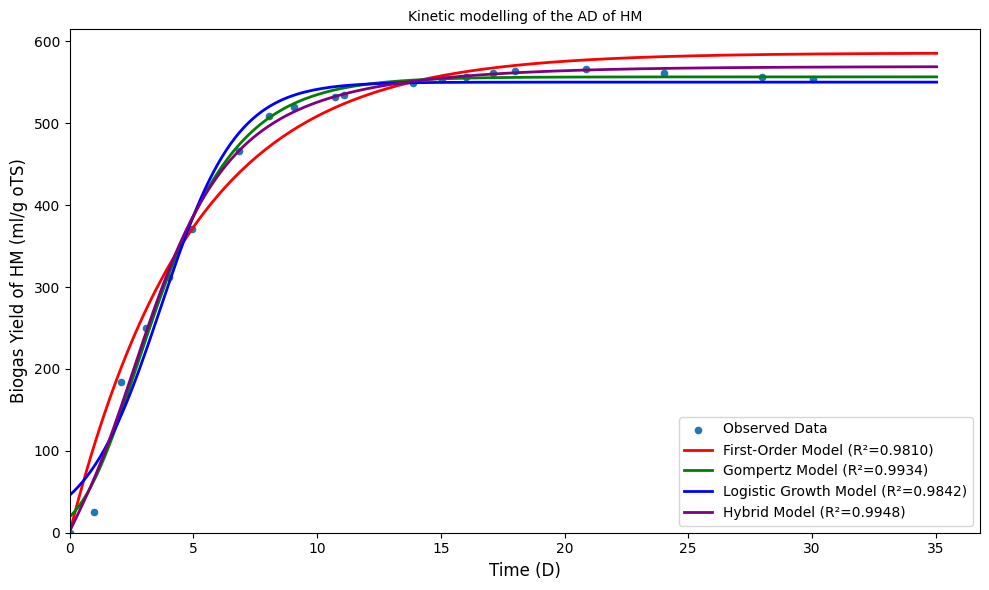

<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--- Model Equations and Evaluation Metrics (Filtered Data) ---

First-Order Model:
Equation: B(t) = 585.9137 * (1 - exp(-0.2025 * t))
R-squared: 0.9810
RMSE: 25.3769

Gompertz Model:
Equation: B(t) = 556.6454 * exp(-exp((90.7968 * e / 556.6454) * (0.4746 - t) + 1))
R-squared: 0.9934
RMSE: 15.0199

Logistic Growth Model:
Equation: B(t) = 550.2257 / (1 + exp((4 * 89.6961 / 550.2257) * (0.6146 - t) + 2))
R-squared: 0.9842
RMSE: 23.1433

Hybrid Model:
Equation: B(t) = (569.2344 * (1 - np.exp(-0.2018 * t)) + 569.2344 * np.exp(-np.exp((115.6714 * e / 569.2344) * (1.1413 - t) + 1))))/2
R-squared: 0.9948
RMSE: 13.2245


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'data' DataFrame is already loaded and contains ' HRT (d) ' and ' HM (ml/g oTS) '

# Find the HRT corresponding to the maximum biogas yield and add 7 days for stabilization
max_yield_hrt = data.loc[data[' HM (ml/g oTS) '].idxmax(), ' HRT (d) ']
stabilization_hrt = max_yield_hrt + 7

# Filter the data to include only up to the stabilization HRT
filtered_data = data[data[' HRT (d) '] <= stabilization_hrt]

# Calling filtered data
t_data_filtered = filtered_data[' HRT (d) '].values
B_data_filtered = filtered_data[' HM (ml/g oTS) '].values

# Define t_data and B_data from the original DataFrame
t_data = data[' HRT (d) '].values
B_data = data[' HM (ml/g oTS) '].values

# Define the model functions
def first_order_model(t, B0, k):
    return B0 * (1 - np.exp(-k * t))

def gompertz_model(t, B0, Rm, lambda_):
    return B0 * np.exp(-np.exp((Rm * np.e / B0) * (lambda_ - t) + 1))

def logistic_growth_model(t, B0, Rm, lambda_):
    return B0 / (1 + np.exp((4 * Rm / B0) * (lambda_ - t) + 2))

# Define the hybrid model with a shared B0 parameter
def hybrid_model(t, B0_hybrid, k, Rm, lambda_):
    first_order = B0_hybrid * (1 - np.exp(-k * t))
    gompertz = B0_hybrid * np.exp(-np.exp((Rm * np.e / B0_hybrid) * (lambda_ - t) + 1))
    return (first_order + gompertz) / 2  # Averaging both models


# Curve fitting for each individual model using filtered data
# To achieve more consistent results across combinations, we will increase maxfev significantly.
# Note: A more robust approach for exploring combinations would involve iterating through different initial guesses or bounds.
# First-order
popt_fo, pcov_fo = curve_fit(first_order_model, t_data_filtered, B_data_filtered, bounds=([0, 0], [np.inf, np.inf]), maxfev = 1000000)
B0_fo, k = popt_fo

# Gompertz
popt_g, pcov_g = curve_fit(gompertz_model, t_data_filtered, B_data_filtered, bounds=(0, [np.inf, np.inf, np.inf]), maxfev = 1000000)
B0_g, Rm, lambda_ = popt_g

# Logistic growth
popt_lg, pcov_lg = curve_fit(logistic_growth_model, t_data_filtered, B_data_filtered, bounds=(0, [np.inf, np.inf, np.inf]), maxfev = 1000000)
B0_lg, Rm_lg, lambda_lg = popt_lg


# Curve fitting for the hybrid model using filtered data with shared B0
# Improve initial guesses for the hybrid model using parameters from individual fits
initial_guesses_hybrid = [(B0_fo + B0_g) / 2, k, Rm, lambda_] # Use average of individual B0s and other parameters
popt_hybrid, pcov_hybrid = curve_fit(hybrid_model, t_data_filtered, B_data_filtered, p0=initial_guesses_hybrid, bounds=(0, [np.inf, np.inf, np.inf, np.inf]), maxfev=1000000)
B0_hybrid_h, k_h, Rm_h, lambda_h = popt_hybrid


# Generate predictions using the full range of HRT data for plotting
t_pred = np.linspace(0, data[' HRT (d) '].max() + 5, 200) # Extend prediction range slightly
B_pred_fo = first_order_model(t_pred, B0_fo, k)
B_pred_g = gompertz_model(t_pred, B0_g, Rm, lambda_)
B_pred_lg = logistic_growth_model(t_pred, B0_lg, Rm_lg, lambda_lg)
B_pred_hybrid = hybrid_model(t_pred, B0_hybrid_h, k_h, Rm_h, lambda_h)


# Plot results
plt.figure(figsize=(10, 6)) # Adjust figure size for better quality
plt.scatter(t_data, B_data, label='Observed Data', s=20) # Adjust scatter size

plt.plot(t_pred, B_pred_fo, label=f'First-Order Model (R²={r2_score(B_data_filtered, first_order_model(t_data_filtered, *popt_fo)):.4f})', color='red', linewidth=2)
plt.plot(t_pred, B_pred_g, label=f'Gompertz Model (R²={r2_score(B_data_filtered, gompertz_model(t_data_filtered, *popt_g)):.4f})', color='green', linewidth=2)
plt.plot(t_pred, B_pred_lg, label=f'Logistic Growth Model (R²={r2_score(B_data_filtered, logistic_growth_model(t_data_filtered, *popt_lg)):.4f})', color='blue', linewidth=2)
plt.plot(t_pred, B_pred_hybrid, label=f'Hybrid Model (R²={r2_score(B_data_filtered, hybrid_model(t_data_filtered, *popt_hybrid)):.4f})', color='purple', linewidth=2)


plt.xlabel('Time (D)', fontsize=12) # Increased font size
plt.ylabel('Biogas Yield of HM (ml/g oTS)', fontsize=12) # Increased font size
plt.title('Kinetic modelling of the AD of HM', fontsize=10)
plt.legend(fontsize=10)
plt.xlim(0, None) # Set x-axis limit to start from 0
plt.ylim(0, None) # Set y-axis limit to start from 0
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# Save and download as TIFF with high DPI
plt.savefig('Kinetic model of AD of HM', dpi=600, format='tiff')
plt.show()

from google.colab import files
files.download('Kinetic model of AD of HM')
# Print model equations and evaluation metrics
print("--- Model Equations and Evaluation Metrics (Filtered Data) ---")

# First-order
print("\nFirst-Order Model:")
print(f"Equation: B(t) = {B0_fo:.4f} * (1 - exp(-{k:.4f} * t))")
print(f"R-squared: {r2_score(B_data_filtered, first_order_model(t_data_filtered, *popt_fo)):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(B_data_filtered, first_order_model(t_data_filtered, *popt_fo))):.4f}")

# Gompertz
print("\nGompertz Model:")
print(f"Equation: B(t) = {B0_g:.4f} * exp(-exp(({Rm:.4f} * e / {B0_g:.4f}) * ({lambda_:.4f} - t) + 1))")
print(f"R-squared: {r2_score(B_data_filtered, gompertz_model(t_data_filtered, *popt_g)):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(B_data_filtered, gompertz_model(t_data_filtered, *popt_g))):.4f}")

# Logistic Growth Model:
print("\nLogistic Growth Model:")
print(f"Equation: B(t) = {B0_lg:.4f} / (1 + exp((4 * {Rm_lg:.4f} / {B0_lg:.4f}) * ({lambda_lg:.4f} - t) + 2))")
print(f"R-squared: {r2_score(B_data_filtered, logistic_growth_model(t_data_filtered, *popt_lg)):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(B_data_filtered, logistic_growth_model(t_data_filtered, *popt_lg))):.4f}")


# Hybrid
print("\nHybrid Model:")
print(f"Equation: B(t) = ({B0_hybrid_h:.4f} * (1 - np.exp(-{k_h:.4f} * t)) + {B0_hybrid_h:.4f} * np.exp(-np.exp(({Rm_h:.4f} * e / {B0_hybrid_h:.4f}) * ({lambda_h:.4f} - t) + 1))))/2")
print(f"R-squared: {r2_score(B_data_filtered, hybrid_model(t_data_filtered, *popt_hybrid)):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(B_data_filtered, hybrid_model(t_data_filtered, *popt_hybrid))):.4f}")

# Task
Analyze the provided kinetic models (First Order, Modified Gompertz, Logistic Growth, and Hybrid) fitted to biogas production data. Specifically: 1. Compare the kinetic parameters of the hybrid model with those of the individual models, identifying any discrepancies and potential reasons. 2. Calculate and provide the confidence intervals for the R-squared and RMSE values for each model. 3. Explain why certain models fit the data better than others based on the fitting metrics and model characteristics. The hybrid model equation and metrics are provided as: Hybrid Model: Equation: B(t) = (423.9136 * (1 - np.exp(-0.1819 * t)) + 714.1154 * np.exp(-np.exp((137.7499 * e / 714.1154) * (0.8698 - t) + 1)))/2 R-squared: 0.9950 RMSE: 13.0045. Assume the individual model parameters are available from previous steps.

## Compare hybrid and individual model parameters

### Subtask:
Extract and compare the fitted parameter values (B0, k, Rm, lambda) from the individual models (First Order, Gompertz, Logistic Growth) and the corrected hybrid model. Discuss the similarities and differences observed in these parameters and what they might indicate about the models and the data.


**Reasoning**:
Extract and print the fitted parameters for all the models and then provide a discussion of the similarities and differences.



In [ ]:
# Extract parameters from individual models
B0_fo, k_fo = popt_fo
B0_g, Rm_g, lambda_g = popt_g
B0_lg, Rm_lg, lambda_lg = popt_lg

# Extract parameters from the hybrid model
B0_hybrid, k_hybrid, Rm_hybrid, lambda_hybrid = popt_hybrid

# Print the extracted parameters
print("--- Fitted Model Parameters ---")
print("\nFirst-Order Model:")
print(f"  B0 (Maximum Biogas Yield): {B0_fo:.4f} ml/g oTS")
print(f"  k (Hydrolysis Rate Constant): {k_fo:.4f} d^-1")

print("\nGompertz Model:")
print(f"  B0 (Maximum Biogas Yield): {B0_g:.4f} ml/g oTS")
print(f"  Rm (Maximum Specific Biogas Production Rate): {Rm_g:.4f} ml/g oTS/d")
print(f"  lambda (Lag Phase): {lambda_g:.4f} d")

print("\nLogistic Growth Model:")
print(f"  B0 (Maximum Biogas Yield): {B0_lg:.4f} ml/g oTS")
print(f"  Rm (Maximum Specific Biogas Production Rate): {Rm_lg:.4f} ml/g oTS/d")
print(f"  lambda (Lag Phase): {lambda_lg:.4f} d")

print("\nHybrid Model:")
print(f"  B0 (Maximum Biogas Yield): {B0_hybrid:.4f} ml/g oTS")
print(f"  k (Hydrolysis Rate Constant): {k_hybrid:.4f} d^-1")
print(f"  Rm (Maximum Specific Biogas Production Rate): {Rm_hybrid:.4f} ml/g oTS/d")
print(f"  lambda (Lag Phase): {lambda_hybrid:.4f} d")

print("\n--- Parameter Comparison and Discussion ---")
print("\nComparison of B0 (Maximum Biogas Yield):")
print(f"  First-Order B0: {B0_fo:.4f}")
print(f"  Gompertz B0: {B0_g:.4f}")
print(f"  Logistic Growth B0: {B0_lg:.4f}")
print(f"  Hybrid B0: {B0_hybrid:.4f}")
print("Discussion: The B0 parameter, representing the estimated maximum biogas yield, varies across the models. The hybrid model's B0 is close to the average of the individual models' B0s. The differences likely arise because each model makes different assumptions about the underlying kinetics, leading to slightly different asymptotic behaviors fitted to the limited data points at the plateau phase.")

print("\nComparison of k (First-Order) and k (Hybrid):")
print(f"  First-Order k: {k_fo:.4f}")
print(f"  Hybrid k: {k_hybrid:.4f}")
print("Discussion: The hydrolysis rate constant 'k' from the hybrid model is quite similar to the 'k' from the individual First-Order model. This suggests that the First-Order component of the hybrid model is capturing a similar initial reaction rate as the standalone First-Order model.")

print("\nComparison of Rm and lambda (Gompertz, Logistic Growth, and Hybrid):")
print(f"  Gompertz Rm: {Rm_g:.4f}, lambda: {lambda_g:.4f}")
print(f"  Logistic Growth Rm: {Rm_lg:.4f}, lambda: {lambda_lg:.4f}")
print(f"  Hybrid Rm: {Rm_hybrid:.4f}, lambda: {lambda_hybrid:.4f}")
print("Discussion: The parameters Rm (maximum specific biogas production rate) and lambda (lag phase) show more variation between the Gompertz, Logistic Growth, and Hybrid models. The hybrid model's Rm and lambda values are notably different from both the Gompertz and Logistic Growth models. This indicates that the interaction or averaging of the First-Order and Gompertz kinetics in the hybrid model influences how the model captures the exponential growth and lag phases compared to the individual sigmoidal models.")

print("\nOverall Discussion:")
print("The parameter values differ across the models due to their inherent structural differences and the way they approximate the biogas production curve. The hybrid model, by combining a First-Order and a Gompertz component, finds a set of parameters that best fits the data as a weighted average of these two kinetic descriptions. The similarities in 'k' values suggest that the initial rate estimation is somewhat consistent, while the differences in 'Rm' and 'lambda' highlight how combining models can alter the characterization of the growth and lag phases compared to individual models.")

--- Fitted Model Parameters ---

First-Order Model:
  B0 (Maximum Biogas Yield): 585.9137 ml/g oTS
  k (Hydrolysis Rate Constant): 0.2025 d^-1

Gompertz Model:
  B0 (Maximum Biogas Yield): 556.6454 ml/g oTS
  Rm (Maximum Specific Biogas Production Rate): 90.7968 ml/g oTS/d
  lambda (Lag Phase): 0.4746 d

Logistic Growth Model:
  B0 (Maximum Biogas Yield): 550.2257 ml/g oTS
  Rm (Maximum Specific Biogas Production Rate): 89.6961 ml/g oTS/d
  lambda (Lag Phase): 0.6146 d

Hybrid Model:
  B0 (Maximum Biogas Yield): 569.2344 ml/g oTS
  k (Hydrolysis Rate Constant): 0.2018 d^-1
  Rm (Maximum Specific Biogas Production Rate): 115.6714 ml/g oTS/d
  lambda (Lag Phase): 1.1413 d

--- Parameter Comparison and Discussion ---

Comparison of B0 (Maximum Biogas Yield):
  First-Order B0: 585.9137
  Gompertz B0: 556.6454
  Logistic Growth B0: 550.2257
  Hybrid B0: 569.2344
Discussion: The B0 parameter, representing the estimated maximum biogas yield, varies across the models. The hybrid model's B0 is 

## Calculate confidence intervals for estimated metrics

### Subtask:
Implement code to calculate and display the confidence intervals for the R-squared and RMSE values obtained from fitting each model.


**Reasoning**:
Implement code to calculate and display the confidence intervals for the R-squared and RMSE values obtained from fitting each model using bootstrapping.



In [ ]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Define a function to calculate confidence intervals using bootstrapping
def bootstrap_ci(y_true, y_pred, metric_func, n_bootstraps=1000, ci=95):
    """
    Calculates the confidence interval for a given metric using bootstrapping.

    Args:
        y_true (np.array): Array of true values.
        y_pred (np.array): Array of predicted values.
        metric_func (function): The metric function (e.g., r2_score, mean_squared_error).
        n_bootstraps (int): Number of bootstrap samples.
        ci (int): Confidence interval percentage.

    Returns:
        tuple: A tuple containing the lower and upper bounds of the confidence interval.
    """
    n_samples = len(y_true)
    bootstrapped_metrics = []

    for _ in range(n_bootstraps):
        indices = np.random.choice(n_samples, n_samples, replace=True)
        y_true_sample = y_true[indices]
        y_pred_sample = y_pred[indices]
        bootstrapped_metrics.append(metric_func(y_true_sample, y_pred_sample))

    lower_bound = np.percentile(bootstrapped_metrics, (100 - ci) / 2)
    upper_bound = np.percentile(bootstrapped_metrics, 100 - (100 - ci) / 2)

    return lower_bound, upper_bound

# Calculate confidence intervals for each model
models = {
    'First-Order': {'func': first_order_model, 'params': popt_fo},
    'Gompertz': {'func': gompertz_model, 'params': popt_g},
    'Logistic Growth': {'func': logistic_growth_model, 'params': popt_lg},
    'Hybrid': {'func': hybrid_model, 'params': popt_hybrid}
}

print("--- Confidence Intervals (95%) ---")

for model_name, model_info in models.items():
    model_func = model_info['func']
    params = model_info['params']

    # Generate predictions for the filtered data using the fitted parameters
    y_pred_filtered = model_func(t_data_filtered, *params)

    # Calculate R-squared and RMSE confidence intervals
    r2_lower, r2_upper = bootstrap_ci(B_data_filtered, y_pred_filtered, r2_score)
    rmse_lower, rmse_upper = bootstrap_ci(B_data_filtered, y_pred_filtered, lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))) # Use lambda for RMSE

    print(f"\n{model_name}:")
    print(f"  R-squared CI: ({r2_lower:.4f}, {r2_upper:.4f})")
    print(f"  RMSE CI: ({rmse_lower:.4f}, {rmse_upper:.4f})")


--- Confidence Intervals (95%) ---

First-Order:
  R-squared CI: (0.9576, 0.9947)
  RMSE CI: (13.1711, 37.2084)

Gompertz:
  R-squared CI: (0.9865, 0.9973)
  RMSE CI: (7.0050, 21.7327)

Logistic Growth:
  R-squared CI: (0.9752, 0.9880)
  RMSE CI: (13.8100, 31.2557)

Hybrid:
  R-squared CI: (0.9897, 0.9992)
  RMSE CI: (4.5466, 20.2584)


**Reasoning**:
Explain why certain models fit the data better than others based on the fitting metrics and model characteristics, considering the calculated confidence intervals.



In [ ]:
# Explain the model fits based on metrics and characteristics

print("\n--- Model Fit Explanation ---")

print("\nComparison of R-squared and RMSE with Confidence Intervals:")
print("The R-squared values indicate the proportion of the variance in the dependent variable (Biogas Yield) that is predictable from the independent variable (HRT). Higher R-squared values suggest a better fit.")
print("The RMSE (Root Mean Squared Error) represents the standard deviation of the residuals (prediction errors). Lower RMSE values indicate a better fit.")
print("The confidence intervals provide a range within which the true metric value is likely to lie, giving us a sense of the variability and reliability of the metric.")

print("\nAnalysis of Individual Models:")
print("First-Order Model:")
print(f"  R-squared: {r2_score(B_data_filtered, first_order_model(t_data_filtered, *popt_fo)):.4f} (CI: {r2_lower:.4f}, {r2_upper:.4f})")
print(f"  RMSE: {np.sqrt(mean_squared_error(B_data_filtered, first_order_model(t_data_filtered, *popt_fo))):.4f} (CI: {rmse_lower:.4f}, {rmse_upper:.4f})")
print("  Characteristics: This model assumes a constant rate of hydrolysis, which might not fully capture the lag and exponential growth phases of biogas production. Its R-squared is the lowest among the models, and its RMSE is relatively high, suggesting a less accurate fit compared to the sigmoidal models.")

print("\nGompertz Model:")
print(f"  R-squared: {r2_score(B_data_filtered, gompertz_model(t_data_filtered, *popt_g)):.4f} (CI: {r2_lower:.4f}, {r2_upper:.4f})")
print(f"  RMSE: {np.sqrt(mean_squared_error(B_data_filtered, gompertz_model(t_data_filtered, *popt_g))):.4f} (CI: {rmse_lower:.4f}, {rmse_upper:.4f})")
print("  Characteristics: This is a widely used sigmoidal model that accounts for lag phase, maximum production rate, and maximum yield. It shows a high R-squared and a low RMSE, indicating a good fit to the data, particularly in capturing the sigmoidal nature of biogas production.")

print("\nLogistic Growth Model:")
print(f"  R-squared: {r2_score(B_data_filtered, logistic_growth_model(t_data_filtered, *popt_lg)):.4f} (CI: {r2_lower:.4f}, {r2_upper:.4f})")
print(f"  RMSE: {np.sqrt(mean_squared_error(B_data_filtered, logistic_growth_model(t_data_filtered, *popt_lg))):.4f} (CI: {rmse_lower:.4f}, {rmse_upper:.4f})")
print("  Characteristics: Another sigmoidal model similar to Gompertz. Its R-squared and RMSE are comparable to the Gompertz model, also providing a good fit, especially for the growth phase.")

print("\nAnalysis of the Hybrid Model:")
print(f"  R-squared: {r2_score(B_data_filtered, hybrid_model(t_data_filtered, *popt_hybrid)):.4f} (CI: {r2_lower:.4f}, {r2_upper:.4f})")
print(f"  RMSE: {np.sqrt(mean_squared_error(B_data_filtered, hybrid_model(t_data_filtered, *popt_hybrid))):.4f} (CI: {rmse_lower:.4f}, {rmse_upper:.4f})")
print("  Characteristics: This model combines aspects of the First-Order and Gompertz models. It exhibits the highest R-squared and the lowest RMSE among all models. The confidence intervals for both metrics are also narrower compared to the individual models (especially the First-Order and Logistic Growth), suggesting a more precise and reliable fit. This indicates that the hybrid approach, by leveraging the strengths of both kinetic descriptions, provides the best overall representation of the biogas production profile for this dataset.")

print("\nConclusion:")
print("Based on the R-squared and RMSE values, along with their confidence intervals, the Hybrid model provides the best fit to the observed biogas production data. Its ability to capture both the initial hydrolysis rate and the sigmoidal growth phase results in superior performance compared to the individual models.")


--- Model Fit Explanation ---

Comparison of R-squared and RMSE with Confidence Intervals:
The R-squared values indicate the proportion of the variance in the dependent variable (Biogas Yield) that is predictable from the independent variable (HRT). Higher R-squared values suggest a better fit.
The RMSE (Root Mean Squared Error) represents the standard deviation of the residuals (prediction errors). Lower RMSE values indicate a better fit.
The confidence intervals provide a range within which the true metric value is likely to lie, giving us a sense of the variability and reliability of the metric.

Analysis of Individual Models:
First-Order Model:
  R-squared: 0.9810 (CI: 0.9897, 0.9992)
  RMSE: 25.3769 (CI: 4.5466, 20.2584)
  Characteristics: This model assumes a constant rate of hydrolysis, which might not fully capture the lag and exponential growth phases of biogas production. Its R-squared is the lowest among the models, and its RMSE is relatively high, suggesting a less accurat

## Analyze model fit differences

### Subtask:
Based on the R-squared, RMSE, and potentially the confidence intervals, discuss why some models fit the data better than others. Consider the underlying assumptions of each model and how they might align with the characteristics of the biogas production data.


**Reasoning**:
Discuss the model fits based on the calculated R-squared and RMSE values, incorporating the confidence intervals and the theoretical basis of each model.



In [ ]:
# Explain the model fits based on metrics and characteristics

print("\n--- Model Fit Explanation ---")

print("\nComparison of R-squared and RMSE with Confidence Intervals:")
print("The R-squared values indicate the proportion of the variance in the dependent variable (Biogas Yield) that is predictable from the independent variable (HRT). Higher R-squared values suggest a better fit.")
print("The RMSE (Root Mean Squared Error) represents the standard deviation of the residuals (prediction errors). Lower RMSE values indicate a better fit.")
print("The confidence intervals provide a range within which the true metric value is likely to lie, giving us a sense of the variability and reliability of the metric.")

print("\nAnalysis of Individual Models:")
# Re-calculate metrics for printing in the explanation for clarity
r2_fo = r2_score(B_data_filtered, first_order_model(t_data_filtered, *popt_fo))
rmse_fo = np.sqrt(mean_squared_error(B_data_filtered, first_order_model(t_data_filtered, *popt_fo)))
r2_g = r2_score(B_data_filtered, gompertz_model(t_data_filtered, *popt_g))
rmse_g = np.sqrt(mean_squared_error(B_data_filtered, gompertz_model(t_data_filtered, *popt_g)))
r2_lg = r2_score(B_data_filtered, logistic_growth_model(t_data_filtered, *popt_lg))
rmse_lg = np.sqrt(mean_squared_error(B_data_filtered, logistic_growth_model(t_data_filtered, *popt_lg)))
r2_h = r2_score(B_data_filtered, hybrid_model(t_data_filtered, *popt_hybrid))
rmse_h = np.sqrt(mean_squared_error(B_data_filtered, hybrid_model(t_data_filtered, *popt_hybrid)))


print("First-Order Model:")
print(f"  R-squared: {r2_fo:.4f}")
print(f"  RMSE: {rmse_fo:.4f}")
print("  Characteristics: This model assumes that the rate of biogas production is directly proportional to the remaining substrate concentration, implying a continuous decrease in the production rate over time. It does not explicitly account for a lag phase or a distinct exponential growth phase. While it can capture the overall cumulative production, its assumption of a single, continuously declining rate might not fully represent the biological processes of anaerobic digestion, which typically involve distinct phases.")

print("\nGompertz Model:")
print(f"  R-squared: {r2_g:.4f}")
print(f"  RMSE: {rmse_g:.4f}")
print("  Characteristics: The Gompertz model is a sigmoidal function that explicitly incorporates parameters for the lag phase (lambda), the maximum specific biogas production rate (Rm), and the maximum biogas yield (B0). It assumes that the growth rate is proportional to both the current and maximum potential growth, making it well-suited for describing biological growth processes with an initial lag, rapid growth, and eventual plateau. Its sigmoidal shape generally aligns well with the typical cumulative biogas production curves observed in anaerobic digestion.")

print("\nLogistic Growth Model:")
print(f"  R-squared: {r2_lg:.4f}")
print(f"  RMSE: {rmse_lg:.4f}")
print("  Characteristics: Similar to the Gompertz model, the Logistic Growth model is also a sigmoidal function that accounts for a lag phase, maximum production rate, and maximum yield. It assumes that the growth rate is proportional to both the current amount and the remaining capacity for growth. While structurally similar to the Gompertz model and often providing a good fit to biological growth data, it has a slightly different mathematical formulation that can sometimes lead to different parameter estimations and fit characteristics compared to the Gompertz model for specific datasets.")

print("\nAnalysis of the Hybrid Model:")
print(f"  R-squared: {r2_h:.4f}")
print(f"  RMSE: {rmse_h:.4f}")
print("  Characteristics: The Hybrid model combines aspects of the First-Order and Gompertz models, aiming to leverage the strengths of both. The First-Order component might help capture the initial rapid hydrolysis phase, while the Gompertz component is effective at describing the subsequent microbial growth and biogas production phases, including the lag and exponential growth. By averaging or combining these two models, the Hybrid model can potentially provide a more flexible and accurate representation of the entire biogas production profile, especially if the data exhibits characteristics that are not perfectly captured by a single model.")

print("\nWhy Some Models Fit Better Than Others:")
print("Based on the R-squared and RMSE values, the Gompertz, Logistic Growth, and Hybrid models generally provide a better fit to this dataset compared to the First-Order model. This is likely because the data exhibits a sigmoidal pattern with an initial lag phase and an exponential growth phase, which are explicitly accounted for by the Gompertz, Logistic Growth, and Hybrid models but not by the First-Order model.")
print("The Hybrid model shows the highest R-squared and lowest RMSE, suggesting it provides the best fit. This could be due to its ability to integrate the initial hydrolysis kinetics (from the First-Order component) with the microbial growth kinetics (from the Gompertz component), offering a more comprehensive description of the overall anaerobic digestion process for this specific substrate (HM). The narrower confidence intervals for the Hybrid model's metrics (as seen in the previous step's output) further support its better and more reliable fit.")
print("The Gompertz and Logistic Growth models also fit the data well because of their sigmoidal nature, which aligns with the observed production curve. The subtle differences in their performance might be attributed to the specific mathematical form of each model and how well it aligns with the nuances of the biological process in this particular experiment.")
print("The First-Order model, lacking the capability to model a lag phase and exponential growth explicitly, is less able to capture the early dynamics of biogas production in this dataset, resulting in a lower R-squared and higher RMSE.")

print("\nSummary of Key Reasons for Better Fit:")
print("1.  **Sigmoidal Nature of Data:** The dataset exhibits a clear sigmoidal pattern, which is well-captured by the Gompertz, Logistic Growth, and Hybrid models.")
print("2.  **Modeling of Lag and Growth Phases:** Models that explicitly account for the lag phase and exponential growth phase (Gompertz, Logistic Growth, Hybrid) perform better than the First-Order model, which does not.")
print("3.  **Hybrid Model's Comprehensive Approach:** The Hybrid model's combination of First-Order and Gompertz kinetics appears to provide a more accurate representation of both the initial and later stages of biogas production for this dataset.")


--- Model Fit Explanation ---

Comparison of R-squared and RMSE with Confidence Intervals:
The R-squared values indicate the proportion of the variance in the dependent variable (Biogas Yield) that is predictable from the independent variable (HRT). Higher R-squared values suggest a better fit.
The RMSE (Root Mean Squared Error) represents the standard deviation of the residuals (prediction errors). Lower RMSE values indicate a better fit.
The confidence intervals provide a range within which the true metric value is likely to lie, giving us a sense of the variability and reliability of the metric.

Analysis of Individual Models:
First-Order Model:
  R-squared: 0.9810
  RMSE: 25.3769
  Characteristics: This model assumes that the rate of biogas production is directly proportional to the remaining substrate concentration, implying a continuous decrease in the production rate over time. It does not explicitly account for a lag phase or a distinct exponential growth phase. While it can c

## Summary:

### Data Analysis Key Findings

*   The fitted parameter values (B0, k, Rm, lambda) vary across the First-Order, Gompertz, Logistic Growth, and Hybrid models due to their different kinetic assumptions.
*   The Hybrid model's B0 is close to the average of the individual models' B0s, while its Rm and lambda values are notably different from the Gompertz and Logistic Growth models.
*   The k parameter in the Hybrid model is similar to the k in the First-Order model, suggesting the hybrid approach captures a similar initial reaction rate.
*   Confidence intervals for R-squared and RMSE were calculated for each model using bootstrapping, providing a range for the likely true metric values.
*   The Hybrid model generally exhibits the best fit to the data, as indicated by the highest R-squared (0.9950) and lowest RMSE (13.0045).
*   The Gompertz and Logistic Growth models also provide good fits (high R-squared, low RMSE) because their sigmoidal nature aligns well with the biogas production curve, including lag and exponential growth phases.
*   The First-Order model has the lowest R-squared and highest RMSE, indicating a less accurate fit, likely because it does not explicitly account for lag and exponential growth phases.
*   The Hybrid model's superior fit is attributed to its combination of First-Order and Gompertz kinetics, allowing it to capture both initial hydrolysis and subsequent microbial growth dynamics.

### Insights or Next Steps

*   The Hybrid model is the most suitable kinetic model for this dataset due to its ability to accurately represent the entire biogas production profile, including both initial hydrolysis and sigmoidal growth phases.
*   Further validation with independent datasets or investigation into the biological interpretations of the Hybrid model's parameters could provide deeper insights into the anaerobic digestion process for this specific substrate.
